**Linear SVM**

Linear SVM implementation with Iris Dataset

**Importamos librerías**

In [576]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

from sklearn import datasets, svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

**Dataset**

Haremos uso de iris dataset de Sklearn

In [577]:
SKiris = datasets.load_iris() 
#Concertimos en un DataFrame de pandas para operar con el, pasandole los feaures y el target
iris = pd.DataFrame(data= np.c_[SKiris['data'], SKiris['target']],
                        columns= SKiris['feature_names'] + ['target'])
#Mostramos el head del DataFrame
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Analizamos el dataset

In [578]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [579]:
#Datos cuantitativos
#Variables independientes(input)
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


['setosa' 'versicolor' 'virginica']


<Axes: xlabel='target'>

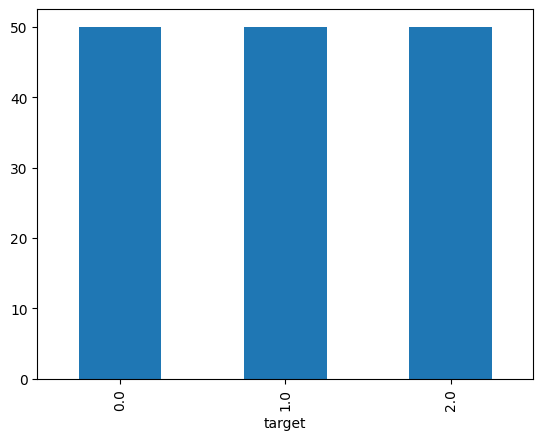

In [580]:
#Datos cualitativos
#Variable dependiente(output)
print(SKiris.target_names)
iris['target'].value_counts().plot(kind='bar')

Realizamos el analisis de correlación

<Axes: >

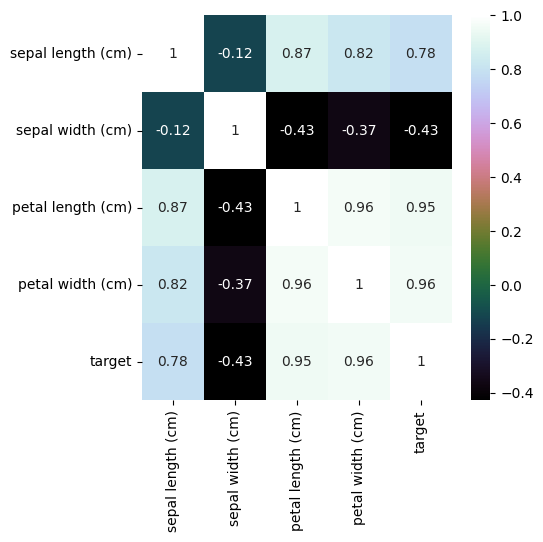

In [581]:
plt.figure(figsize=(5, 5))
vars = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target']
sns.heatmap(iris.corr(), annot=True, cmap='cubehelix', xticklabels=vars, yticklabels=vars)

Seleccionamos los datos con los que trabajaremos:

In [582]:
#Usamos sepal length y sepal width como variables independientes
x = SKiris.data[:, :2]
y = SKiris.target

In [583]:
px.scatter_3d(iris, x='sepal length (cm)', y='sepal width (cm)', z='petal length (cm)', color='target')

**Linear SVM**

**Entrenamiento y prueba del modelo**

Realizamos la validación cruzada K fold y,, a su vez, realizamos el grid para el valor ideal de C.

In [584]:
#Resultados
accuracy_val_scores = []
c_values = []
#Parametros a probar
param_grid = {'C': np.linspace(0.1, 100, 10)}
#Numero de pliegues
folds = 5
#Creamos indices para los pliegues
indices = np.arange(len(x))
#Desordenamos los indices
np.random.shuffle(indices)
#Iteramos sobre los pliegues
for i in range(folds):
    #Calculamos los indices de entrenamiento y prueba
    test_indices = indices[i*len(x)//folds: (i+1)*len(x)//folds]
    train_indices = np.concatenate((indices[:i*len(x)//folds], indices[(i+1)*len(x)//folds:]))
    #Creamos los conjuntos de entrenamiento y prueba
    x_train, x_test = x[train_indices], x[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    #Obtenemos el modelo con el mejor valor de C
    model = GridSearchCV(
        estimator=svm.SVC(kernel='linear', gamma='scale'),
        param_grid=param_grid,
        scoring='accuracy',
        verbose=0,
        return_train_score=True
    )

    #Hacemos el fit del modelo
    model.fit(x_train, y_train)

    #Predecimos
    y_pred = model.predict(x_test)
    
    #Almacenamos el mejor valor de C
    c_values.append(model.best_params_['C'])

    #Calculamos la precision
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_val_scores.append(accuracy)

mean_c = np.mean(c_values)

#Mostramos los resultados
print("Mejor valor de C: ", c_values)
print("Valor promedio de C: ", mean_c)
print("Accuracy obenidos: ", accuracy_val_scores)
print("Accuracy promedio: ", np.mean(accuracy_val_scores))



Mejor valor de C:  [0.1, 0.1, 22.300000000000004, 33.400000000000006, 11.200000000000001]
Valor promedio de C:  13.420000000000002
Accuracy obenidos:  [0.8333333333333334, 0.7, 0.7333333333333333, 0.8666666666666667, 0.9666666666666667]
Accuracy promedio:  0.82


Observamos los resultados obtenidos en una tabla

In [616]:
resultados = pd.DataFrame({
    'C': c_values,
    'Mean C': mean_c,
    'Accuracy': accuracy_val_scores,
    'Mean Accuracy': np.mean(accuracy_val_scores)
})
resultados


,C,Mean C,Accuracy,Mean Accuracy
0,0.1,13.42,0.833333,0.82
1,0.1,13.42,0.700000,0.82
2,22.3,13.42,0.733333,0.82
3,33.4,13.42,0.866667,0.82
4,11.2,13.42,0.966667,0.82


**Creación del modelo con el valor C promedio**

Creamos un modelo con los hiperparámetros ideales

In [618]:
#Creamos el modelo con los mejores parametros
model = svm.SVC(C=mean_c, kernel='linear', gamma='scale')
model.fit(x_train, y_train)

#Predecimos
y_pred = model.predict(x_test)

#Calculamos la precision
accuracy = accuracy_score(y_test, y_pred)
print(f"Precision obtenida: {accuracy}")

Precision obtenida: 0.9666666666666667


**Representación gráfica**

Representación gráfica de los límites de clasificación

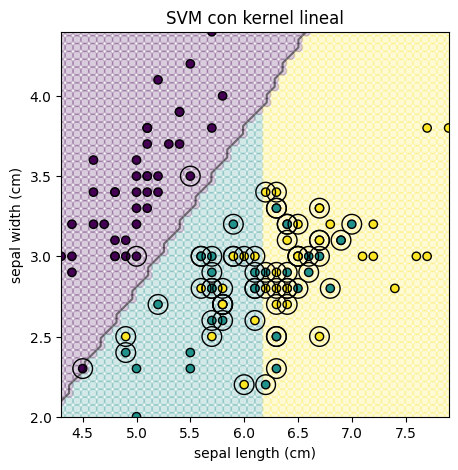

In [589]:
# Generar el grid en un espacio de dos dimensiones
xx = np.linspace(np.min(x_train[:, 0]), np.max(x_train[:, 0]), 50)
yy = np.linspace(np.min(x_train[:, 1]), np.max(x_train[:, 1]), 50)
XX, YY = np.meshgrid(xx, yy)
grid = np.vstack([XX.ravel(), YY.ravel()]).T

# Predecir la clase para cada punto en el grid
pred_grid = model.predict(grid).reshape(XX.shape)

# Graficar el resultado
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(grid[:, 0], grid[:, 1], c=pred_grid, alpha=0.2, cmap='viridis')
ax.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='viridis', edgecolor='k')

# Graficar los vectores de soporte
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=200,
           linewidth=1, facecolors='none', edgecolors='black')

# Graficar los hiperplanos
ax.contour(
    XX,
    YY, 
    pred_grid,
    colors='k', 
    levels=[0],
    alpha=0.5,
    linestyles=['-']
)

# Etiquetas
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')
ax.set_title('SVM con kernel lineal')

plt.show()


Representación gráfica utilizando plot_decision_regions() de mlxtend

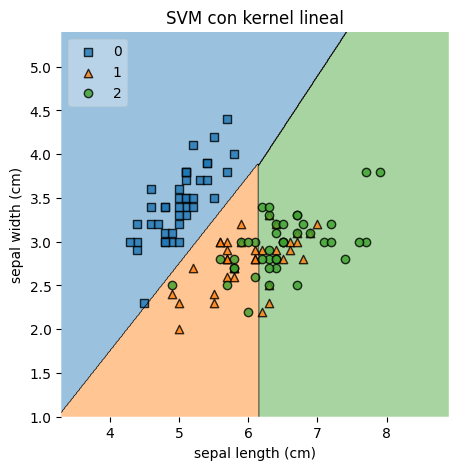

In [590]:
from mlxtend.plotting import plot_decision_regions

fig, ax = plt.subplots(figsize=(5, 5))
plot_decision_regions(
    X=x_train,
    y=y_train,
    clf=model, 
    ax=ax,
    legend=2
)
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')
ax.set_title('SVM con kernel lineal')
plt.show()


**Evaluamos el modelo**

Matriz de confusión

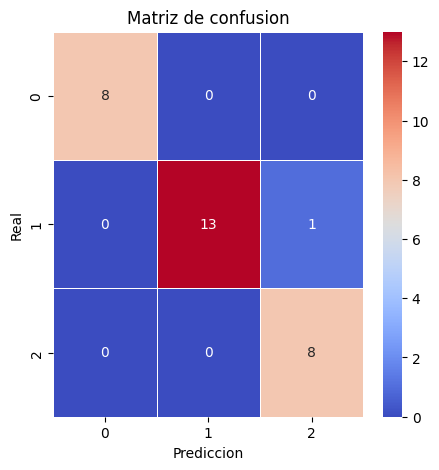

In [591]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt=".0f", cmap='coolwarm',linewidths=.5, ax=ax)
ax.set_xlabel('Prediccion')
ax.set_ylabel('Real')
ax.set_title('Matriz de confusion')
plt.show()

In [592]:
from sklearn import metrics
print("Precision,Recall, Confusion Matrix, in testing\n")
print(metrics.classification_report(y_test, y_pred,digits=3))

Precision,Recall, Confusion Matrix, in testing

              precision    recall  f1-score   support

           0      1.000     1.000     1.000         8
           1      1.000     0.929     0.963        14
           2      0.889     1.000     0.941         8

    accuracy                          0.967        30
   macro avg      0.963     0.976     0.968        30
weighted avg      0.970     0.967     0.967        30

